<a href="https://colab.research.google.com/github/Yosilber/LonCsv/blob/main/cifar_10_mini_project_Yoav_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
from tensorflow import keras

In [64]:
model = keras.Sequential([])

In [65]:
model.add(keras.layers.Input(shape=(3072,)))

In [66]:
# prompt: add to model a dense layer with 4 neurons and relu activation

model.add(keras.layers.Dense(16, activation='relu'))


In [67]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 16)                  │          49,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,168 (192.06 KB)

 Trainable params: 49,168 (192.06 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [69]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,390 (192.93 KB)

 Trainable params: 49,390 (192.93 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# prompt: load cifar-10

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [71]:
type(x_train)

numpy.ndarray

In [72]:
x_train.shape

(50000, 32, 32, 3)

In [73]:
x_test.shape

(10000, 32, 32, 3)

In [74]:
y_train.shape

(50000, 1)

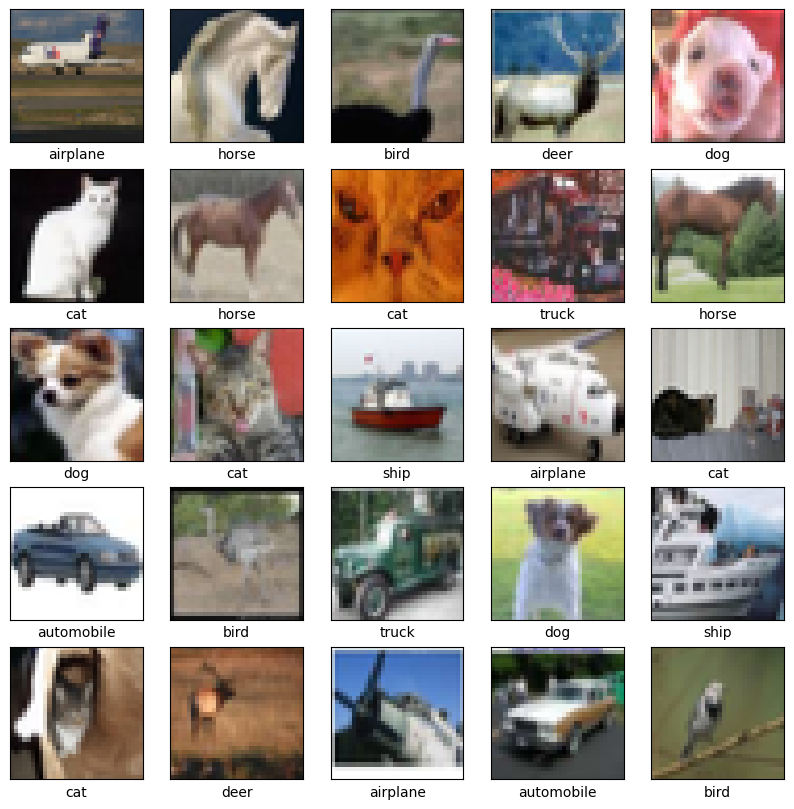

In [75]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select 25 random indices
num_images = 25
random_indices = np.random.choice(x_train.shape[0], num_images, replace=False)

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[random_indices[i]], cmap=plt.cm.binary)
    label = y_train[random_indices[i]][0]
    plt.xlabel(class_names[label])

plt.show()

In [76]:
y_train.shape

(50000, 1)

In [77]:
# prompt: flatten x_train

x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_train_flattened.shape

(50000, 3072)

In [78]:
# prompt: compile model with categorical cross entropy

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# prompt: fit the model x_train_flattened y_train for 1000 epocs

history = model.fit(x_train_flattened, y_train, epochs=1000)


Epoch 1/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0957 - loss: 3.2449
Epoch 2/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1003 - loss: 2.3027
Epoch 3/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028
Epoch 4/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1005 - loss: 2.3027
Epoch 5/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1002 - loss: 2.3027
Epoch 6/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1014 - loss: 2.3026
Epoch 7/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0999 - loss: 2.3028
Epoch 8/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1041 - loss: 2.3026
Epoch 9/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1011 - loss: 2.3028
Epoch 10/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0988 - loss: 2.3027
Epoch 11/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0990 - loss: 2.3027
Epoch 12